In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeRegressor

In [8]:
dataset = pd.read_csv('position_salary.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [9]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, Y)
regressor.predict([[6.5]])

array([150000.])

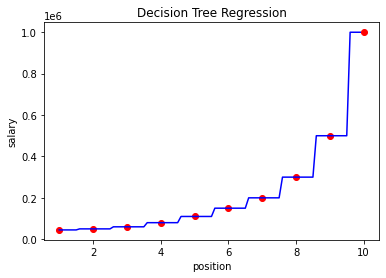

In [10]:
# wrong algorithm "overfits", dataset not appropriate (1D)
x_grid = np.arange(min(X), max(X), 0.1)
x_grid = x_grid.reshape(-1, 1)

plt.scatter(X, Y, color='red')
plt.plot(x_grid, regressor.predict(x_grid), color='blue')
plt.title('Decision Tree Regression')
plt.xlabel('position')
plt.ylabel('salary')
plt.show()

In [11]:
# appropriate dataset, multi-dimensional
dataset = pd.read_csv('product_sale.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [12]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [13]:
imputer = SimpleImputer()
X[:, 1:3] = imputer.fit_transform(X[:, 1:3])

In [14]:
col_transformer = ColumnTransformer([('Country', OneHotEncoder(), [0])], remainder='passthrough')
X = col_transformer.fit_transform(X)
X = X[:, 1:] # dummy variable trap

In [15]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, Y)
regressor.predict([[1.0, 0.0, 32.0, 53000.0]])

array([0.])